In [54]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt

## Data loading and pre-processing

In [51]:
forecast_df = pd.read_csv('/Users/vidhiparmar/Desktop/projects/future_genre/trend_data/forecasts.csv')
forecast_df['date'] = pd.to_datetime(forecast_df['date'])
forecast_df.set_index('date', inplace= True)

## Normalizing to get a same scale df for all genres

In [52]:

scaler = MinMaxScaler(feature_range=(0, 100))  # scale to 0–100 for visualization
scaled_values = scaler.fit_transform(forecast_df)

# Creating a new DataFrame with the same index and columns
normalized_forecast = pd.DataFrame(scaled_values,
                                   index=forecast_df.index,
                                   columns=forecast_df.columns
                                   )


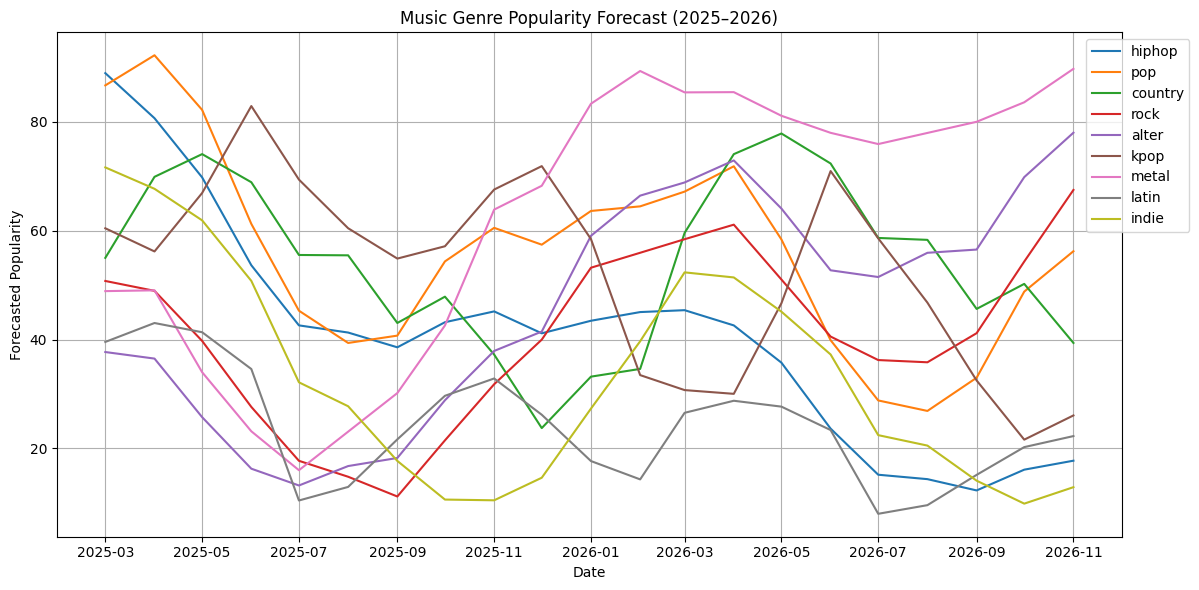

In [58]:
smoothed = normalized_forecast.rolling(window=4, center=True).mean()

plt.figure(figsize=(12, 6))
for genre in smoothed.columns:
    plt.plot(smoothed.index, smoothed[genre], label=genre)

plt.title("Music Genre Popularity Forecast (2025–2026)")
plt.xlabel("Date")
plt.ylabel("Forecasted Popularity")
plt.legend(bbox_to_anchor=(1.07, 1), loc= 'upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [57]:
start_values = normalized_forecast.iloc[0].replace(0, 0.0001)
growth_df = (normalized_forecast.iloc[-1] - start_values) / start_values * 100
growth_df = growth_df.sort_values(ascending=False).round(2)
growth_df = growth_df.round(2)

# Create a table
growth_table = pd.DataFrame({
    '2025 Start': normalized_forecast.iloc[0],
    '2026 End': normalized_forecast.iloc[-1],
    '% Growth': growth_df
})
growth_table

,2025 Start,2026 End,% Growth
alter,14.820406,100.000000,574.75
country,21.153540,1.839569,-91.30
hiphop,100.000000,11.168478,-88.83
indie,45.702955,28.335733,-38.00
kpop,90.417614,31.304716,-65.38
latin,11.330990,11.570275,2.11
metal,34.951695,100.000000,186.11
pop,65.048993,49.305980,-24.20
rock,36.814142,100.000000,171.63


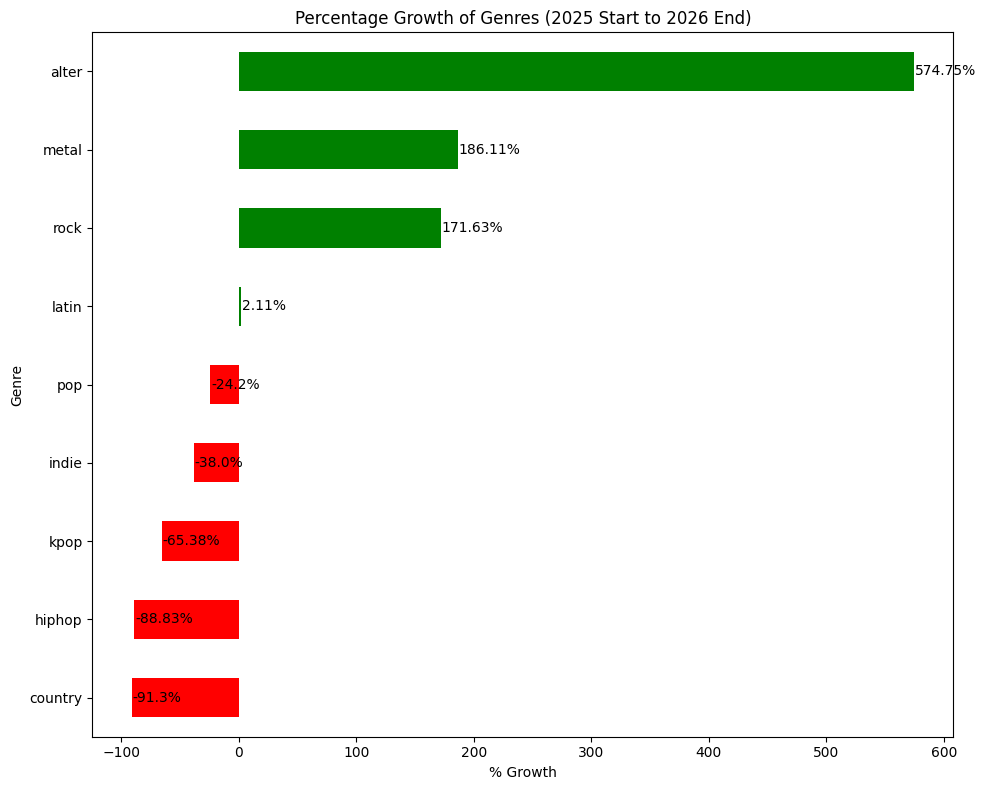

In [49]:
import matplotlib.pyplot as plt


growth_table_sorted = growth_table.sort_values(by='% Growth', ascending=False)

colors = ['green' if x >= 0 else 'red' for x in growth_table_sorted['% Growth']]

# Plot % Growth as a horizontal bar chart for better readability if you have many genres
plt.figure(figsize=(10, 8))
growth_table_sorted['% Growth'].plot(kind='barh', color=colors)

plt.title('Percentage Growth of Genres (2025 Start to 2026 End)')
plt.xlabel('% Growth')
plt.ylabel('Genre')

# Invert y-axis so highest growth is on top
plt.gca().invert_yaxis()

# Add value labels on bars
for i, v in enumerate(growth_table_sorted['% Growth']):
    plt.text(v + 0.5, i, f"{v}%", va='center')

plt.tight_layout()
plt.show()


- Alter (Alternative) shows an explosive forecasted growth of +575%, indicating a massive surge in interest. This suggests alternative music is poised to gain significant traction, possibly fueled by emerging artists or shifting listener preferences toward more niche, experimental sounds.

- Metal and Rock genres also exhibit strong positive growth, with +186% and +172% respectively. This revival hints at a resurgence in these traditionally dominant genres, perhaps tied to renewed fan engagement or successful crossover trends.

- On the flip side, genres like Country (-91%), Hip-Hop (-89%), K-Pop (-65%), and Indie (-38%) show significant declines in relative interest. These steep drops could reflect market saturation, shifting cultural trends, or evolving listener demographics.

- Pop music is projected to decline moderately by -24%, which may indicate fragmentation in mainstream tastes or competition from rising genres.

- Latin music remains essentially flat with a modest growth of +2%, signaling stable but not accelerating interest.